# NBA retirement prediction

In [1105]:
# Install dependencies as needed:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# DATA:

# Player Totals

In [1106]:
# Set the path to the file you'd like to load
file_path = "Player Totals.csv"

# Load the latest version
playerTotalsDf = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "sumitrodatta/nba-aba-baa-stats",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print(playerTotalsDf.head())

   season   lg            player  player_id   age team pos   g    gs     mp  \
0    2026  NBA  Precious Achiuwa  achiupr01  26.0  SAC   C  14   6.0  293.0   
1    2026  NBA      Steven Adams  adamsst01  32.0  HOU   C  15   4.0  324.0   
2    2026  NBA       Bam Adebayo  adebaba01  28.0  MIA   C  14  14.0  425.0   
3    2026  NBA      Ochai Agbaji  agbajoc01  25.0  TOR  SG  15   1.0  204.0   
4    2026  NBA      Santi Aldama  aldamsa01  25.0  MEM  PF  21   2.0  548.0   

   ...   orb    drb    trb  ast   stl   blk   tov    pf  pts  trp_dbl  
0  ...  25.0   48.0   73.0   14   9.0   6.0   7.0  24.0  102      0.0  
1  ...  74.0   67.0  141.0   23  10.0  10.0  15.0  29.0   97      0.0  
2  ...  18.0  101.0  119.0   36  13.0  11.0  26.0  20.0  264      0.0  
3  ...   5.0   23.0   28.0   10   6.0   2.0   5.0  26.0   46      0.0  
4  ...  31.0  108.0  139.0   63  20.0  16.0  23.0  26.0  282      0.0  

[5 rows x 33 columns]


# Player Per Game

In [1107]:
# Set the path to the file you'd like to load
file_path = "Player Per Game.csv"

# Load the latest version
playerPerGameDf = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "sumitrodatta/nba-aba-baa-stats",
  file_path,
)

print(playerPerGameDf.head())

   season   lg            player  player_id   age team pos   g    gs  \
0    2026  NBA  Precious Achiuwa  achiupr01  26.0  SAC   C  14   6.0   
1    2026  NBA      Steven Adams  adamsst01  32.0  HOU   C  15   4.0   
2    2026  NBA       Bam Adebayo  adebaba01  28.0  MIA   C  14  14.0   
3    2026  NBA      Ochai Agbaji  agbajoc01  25.0  TOR  SG  15   1.0   
4    2026  NBA      Santi Aldama  aldamsa01  25.0  MEM  PF  21   2.0   

   mp_per_game  ...  ft_percent  orb_per_game  drb_per_game  trb_per_game  \
0         20.9  ...       0.458           1.8           3.4           5.2   
1         21.6  ...       0.775           4.9           4.5           9.4   
2         30.4  ...       0.806           1.3           7.2           8.5   
3         13.6  ...       0.700           0.3           1.5           1.9   
4         26.1  ...       0.673           1.5           5.1           6.6   

   ast_per_game  stl_per_game  blk_per_game  tov_per_game  pf_per_game  \
0           1.0           0.6 

# Player Per 36 Mins

In [1108]:
# Set the path to the file you'd like to load
file_path = "Per 36 Minutes.csv"

# Load the latest version
per36MinsDf = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "sumitrodatta/nba-aba-baa-stats",
  file_path,
)

print(per36MinsDf.head())

   season   lg            player  player_id   age team pos   g    gs   mp  \
0    2026  NBA  Precious Achiuwa  achiupr01  26.0  SAC   C  14   6.0  293   
1    2026  NBA      Steven Adams  adamsst01  32.0  HOU   C  15   4.0  324   
2    2026  NBA       Bam Adebayo  adebaba01  28.0  MIA   C  14  14.0  425   
3    2026  NBA      Ochai Agbaji  agbajoc01  25.0  TOR  SG  15   1.0  204   
4    2026  NBA      Santi Aldama  aldamsa01  25.0  MEM  PF  21   2.0  548   

   ...  ft_percent  orb_per_36_min  drb_per_36_min  trb_per_36_min  \
0  ...       0.458             3.1             5.9             9.0   
1  ...       0.775             8.2             7.4            15.7   
2  ...       0.806             1.5             8.6            10.1   
3  ...       0.700             0.9             4.1             4.9   
4  ...       0.673             2.0             7.1             9.1   

   ast_per_36_min  stl_per_36_min  blk_per_36_min  tov_per_36_min  \
0             1.7             1.1             0

# Player Per 100 Possesions

In [1109]:
# Set the path to the file you'd like to load
file_path = "Per 100 Poss.csv"

# Load the latest version
per100PossDf = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "sumitrodatta/nba-aba-baa-stats",
  file_path,
)

print(per100PossDf.head())

   season   lg            player  player_id  age team pos   g    gs   mp  ...  \
0    2026  NBA  Precious Achiuwa  achiupr01   26  SAC   C  14   6.0  293  ...   
1    2026  NBA      Steven Adams  adamsst01   32  HOU   C  15   4.0  324  ...   
2    2026  NBA       Bam Adebayo  adebaba01   28  MIA   C  14  14.0  425  ...   
3    2026  NBA      Ochai Agbaji  agbajoc01   25  TOR  SG  15   1.0  204  ...   
4    2026  NBA      Santi Aldama  aldamsa01   25  MEM  PF  21   2.0  548  ...   

   drb_per_100_poss  trb_per_100_poss  ast_per_100_poss  stl_per_100_poss  \
0               7.8              11.8               2.3               1.5   
1              10.3              21.7               3.5               1.5   
2              10.8              12.7               3.9               1.4   
3               5.4               6.6               2.4               1.4   
4               9.4              12.1               5.5               1.7   

   blk_per_100_poss  tov_per_100_poss  pf_per_100_

# Player Advanced Stats

In [1110]:
# Set the path to the file you'd like to load
file_path = "Advanced.csv"

# Load the latest version
advancedStatsDf = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "sumitrodatta/nba-aba-baa-stats",
  file_path,
)

print(advancedStatsDf.head())

   season   lg            player  player_id   age team pos   g    gs     mp  \
0    2026  NBA  Precious Achiuwa  achiupr01  26.0  SAC   C  14   6.0  293.0   
1    2026  NBA      Steven Adams  adamsst01  32.0  HOU   C  15   4.0  324.0   
2    2026  NBA       Bam Adebayo  adebaba01  28.0  MIA   C  14  14.0  425.0   
3    2026  NBA      Ochai Agbaji  agbajoc01  25.0  TOR  SG  15   1.0  204.0   
4    2026  NBA      Santi Aldama  aldamsa01  25.0  MEM  PF  21   2.0  548.0   

   ...  tov_percent  usg_percent  ows  dws   ws  ws_48  obpm  dbpm  bpm  vorp  
0  ...          7.1         14.3  0.3  0.2  0.4  0.068  -1.4  -0.8 -2.2   0.0  
1  ...         15.4         12.4  0.9  0.5  1.4  0.208   2.3  -0.3  1.9   0.3  
2  ...         10.1         24.5  0.3  0.8  1.1  0.119   0.9   1.1  2.0   0.4  
3  ...          8.6         12.1 -0.2  0.2  0.1  0.017  -6.6  -0.3 -6.9  -0.3  
4  ...          8.3         20.9  0.6  0.8  1.3  0.118   1.9   1.2  3.1   0.7  

[5 rows x 30 columns]


# Player play by play stats

In [1111]:
# Set the path to the file you'd like to load
file_path = "Player Play By Play.csv"

# Load the latest version
playByPlayDf = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "sumitrodatta/nba-aba-baa-stats",
  file_path,
)

print(playByPlayDf.head())

   season   lg            player  player_id  age team pos   g  gs   mp  ...  \
0    2026  NBA  Precious Achiuwa  achiupr01   26  SAC   C  14   6  293  ...   
1    2026  NBA      Steven Adams  adamsst01   32  HOU   C  15   4  324  ...   
2    2026  NBA       Bam Adebayo  adebaba01   28  MIA   C  14  14  425  ...   
3    2026  NBA      Ochai Agbaji  agbajoc01   25  TOR  SG  15   1  204  ...   
4    2026  NBA      Santi Aldama  aldamsa01   25  MEM  PF  21   2  548  ...   

   net_plus_minus_per_100_poss  bad_pass_turnover  lost_ball_turnover  \
0                          6.4                  2                   1   
1                          9.8                  5                   3   
2                          8.5                 10                  11   
3                          1.3                  2                   2   
4                         -3.5                 11                   7   

   shooting_foul_committed  offensive_foul_committed  shooting_foul_drawn  \
0        

# Height and Weight Data

In [1112]:
# Set the path to the file you'd like to load
file_path = "Players.csv"

# Load the latest version
HeightAndWeightDf = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "drgilermo/nba-players-stats",
  file_path,
)

HeightAndWeightDf = HeightAndWeightDf.rename(columns={'Player': 'player'})
print(HeightAndWeightDf.head())

   Unnamed: 0           player  height  weight  \
0           0  Curly Armstrong   180.0    77.0   
1           1     Cliff Barker   188.0    83.0   
2           2    Leo Barnhorst   193.0    86.0   
3           3       Ed Bartels   196.0    88.0   
4           4      Ralph Beard   178.0    79.0   

                           collage    born   birth_city birth_state  
0               Indiana University  1918.0          NaN         NaN  
1           University of Kentucky  1921.0     Yorktown     Indiana  
2         University of Notre Dame  1924.0          NaN         NaN  
3  North Carolina State University  1925.0          NaN         NaN  
4           University of Kentucky  1927.0  Hardinsburg    Kentucky  


# Injury Data

In [1113]:
# Set the path to the file you'd like to load
file_path = "injuries_2010-2020.csv"

# Load the latest version
injuryDF = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "ghopkins/nba-injuries-2010-2018",
  file_path,
)
injuryDF = injuryDF.rename(columns={'Relinquished': 'player'})

injury_counts = injuryDF['player'].value_counts().reset_index()
injury_counts.columns = ['player', 'num_injuries']

print(injuryDF.head())

         Date     Team Acquired         player  \
0  2010-10-03    Bulls      NaN  Carlos Boozer   
1  2010-10-06  Pistons      NaN  Jonas Jerebko   
2  2010-10-06  Pistons      NaN  Terrico White   
3  2010-10-08  Blazers      NaN     Jeff Ayres   
4  2010-10-08     Nets      NaN    Troy Murphy   

                                               Notes  
0  fractured bone in right pinky finger (out inde...  
1      torn right Achilles tendon (out indefinitely)  
2  broken fifth metatarsal in right foot (out ind...  
3          torn ACL in right knee (out indefinitely)  
4             strained lower back (out indefinitely)  


# Merging data into 1 dataset

In [1114]:
#Merge data into one big dataset
mergedDF = playerTotalsDf
mergedDF = pd.merge(mergedDF, playerPerGameDf, on=["player_id", "season"], how="outer", suffixes=("", "_per_game"))
mergedDF = pd.merge(mergedDF, per36MinsDf, on=["player_id", "season"], how="outer", suffixes=("", "_per_36_mins"))
mergedDF = pd.merge(mergedDF, per100PossDf, on=["player_id", "season"], how="outer", suffixes=("", "_per_100_poss"))
mergedDF = pd.merge(mergedDF, advancedStatsDf, on=["player_id", "season"], how="outer", suffixes=("", "_advanced"))
finalDF = mergedDF.drop_duplicates(subset=['season', 'player'])


print(finalDF[26700:26730])

        season   lg             player  player_id   age team pos   g    gs  \
803813    1960  NBA     George Yardley  yardlge01  31.0  SYR  SF  73   NaN   
803814    1972  NBA        Barry Yates  yatesba01  26.0  PHI  PF  24   1.0   
803815    1962  NBA        Wayne Yates  yateswa01  24.0  LAL   C  37   NaN   
803816    1972  NBA  Charlie Yelverton  yelvech01  23.0  POR  SG  69   NaN   
803817    1982  NBA       Rich Yonakor  yonakri01  23.0  SAS  PF  10   0.0   
803818    2022  NBA          Gabe York   yorkga01  28.0  IND  SG   2   0.0   
803819    2023  NBA          Gabe York   yorkga01  29.0  IND  SG   3   0.0   
803820    2026  NBA   Chris Youngblood  youngch01  23.0  OKC  SG  16   0.0   
803821    1985  NBA        Danny Young  youngda01  22.0  SEA  PG   3   0.0   
803822    1986  NBA        Danny Young  youngda01  23.0  SEA  PG  82  29.0   
803823    1987  NBA        Danny Young  youngda01  24.0  SEA  PG  73  26.0   
803824    1988  NBA        Danny Young  youngda01  25.0  SEA  PG

# Creating column for year retired, NaN if still playing

In [1115]:
# players not retired yet
activePlayers = finalDF.groupby("player")["season"].max().eq(2026)
retirementYears = finalDF.groupby("player")["season"].max().where(~activePlayers)
finalDF['retired'] = finalDF['player'].map(retirementYears)

finalDF[26700:26730]

/var/folders/_b/qm30jgm53fqdy5bnwf_lv5x00000gn/T/ipykernel_90441/871040093.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalDF['retired'] = finalDF['player'].map(retirementYears)


,season,lg,player,player_id,age,team,pos,g,gs,mp,...,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp,retired
803813,1960,NBA,George Yardley,yardlge01,31.0,SYR,SF,73,NaN,2402.0,...,NaN,6.9,2.1,9.0,0.179,NaN,NaN,NaN,NaN,1960.0
803814,1972,NBA,Barry Yates,yatesba01,26.0,PHI,PF,24,1.0,144.0,...,NaN,-0.4,0.1,-0.2,-0.075,NaN,NaN,NaN,NaN,1972.0
803815,1962,NBA,Wayne Yates,yateswa01,24.0,LAL,C,37,NaN,263.0,...,NaN,-0.8,0.3,-0.5,-0.085,NaN,NaN,NaN,NaN,1962.0
803816,1972,NBA,Charlie Yelverton,yelvech01,23.0,POR,SG,69,NaN,1227.0,...,NaN,-0.7,0.3,-0.5,-0.018,NaN,NaN,NaN,NaN,1972.0
803817,1982,NBA,Rich Yonakor,yonakri01,23.0,SAS,PF,10,0.0,70.0,...,17.7,0.2,0.1,0.3,0.201,-1.2,-0.6,-1.8,0.1,1982.0
803818,2022,NBA,Gabe York,yorkga01,28.0,IND,SG,2,0.0,21.0,...,20.8,0.0,0.0,0.0,0.059,-3.7,2.2,-1.5,0.0,2023.0
803819,2023,NBA,Gabe York,yorkga01,29.0,IND,SG,3,0.0,56.0,...,16.4,0.1,0.0,0.1,0.091,-1.7,-1.8,-3.5,0.0,2023.0
803820,2026,NBA,Chris Youngblood,youngch01,23.0,OKC,SG,16,0.0,80.0,...,13.8,0.1,0.1,0.2,0.114,-4.6,-1.0,-5.6,-0.1,NaN
803821,1985,NBA,Danny Young,youngda01,22.0,SEA,PG,3,0.0,26.0,...,19.3,-0.2,0.0,-0.1,-0.188,-9.9,3.8,-6.1,0.0,1995.0
803822,1986,NBA,Danny Young,youngda01,23.0,SEA,PG,82,29.0,1901.0,...,12.9,2.7,2.1,4.8,0.121,0.2,1.7,1.9,1.9,1995.0


In [1116]:
#Make a variable that holds career length for each player
careerLen = finalDF.groupby("player_id")["season"].nunique().reset_index()

careerLen.columns = ["player_id", "career_length"]
finalDF = finalDF.merge(careerLen, on="player_id", how="left")
finalDF[["player","career_length"]][26703:26713]

,player,career_length
26703,Charlie Yelverton,1
26704,Rich Yonakor,1
26705,Gabe York,2
26706,Gabe York,2
26707,Chris Youngblood,1
26708,Danny Young,10
26709,Danny Young,10
26710,Danny Young,10
26711,Danny Young,10
26712,Danny Young,10


In [1117]:
#Create a copy of the DF that removes all the active players so we can gather more accurate predictive conclusions about retirement.
retiredDF = finalDF.copy()
retiredDF = retiredDF[retiredDF['retired'].notna()]
retiredDF = retiredDF.reset_index(drop=True)

In [1118]:
# creating dataframe of career averages for each retired player

avgData = retiredDF.copy()
avgData["gs_g_ratio"] = avgData["gs"]/avgData["g"].replace(0, np.nan)

numeric_cols = [
    'career_length','mp','gs_g_ratio','fg','fga','fg_percent',
    'x3p','x3pa','x3p_percent',
    'x2p','x2pa','x2p_percent',
    'e_fg_percent','ft','fta','ft_percent'
]
non_numeric_cols = ['player', 'pos']
numeric_means = avgData.groupby('player_id')[numeric_cols].mean().reset_index()
non_numeric_first = avgData.groupby('player_id')[non_numeric_cols].first().reset_index()
retirement_age = avgData.groupby('player_id')['age'].max().reset_index(name='retirement_age')
avgData = numeric_means.merge(non_numeric_first, on='player_id')
avgData = avgData.merge(retirement_age, on='player_id')

# add heights and weights
avgData = avgData.merge(HeightAndWeightDf[['player', 'height', 'weight']], on='player', how='left')
# add injuries
avgData = avgData.merge(injury_counts, on='player', how='left')

avgData

,player_id,career_length,mp,gs_g_ratio,fg,fga,fg_percent,x3p,x3pa,x3p_percent,...,e_fg_percent,ft,fta,ft_percent,player,pos,retirement_age,height,weight,num_injuries
0,abdelal01,5.0,640.000000,0.141484,124.000000,247.200000,0.486400,0.000000,0.600000,0.000000,...,0.486400,45.000000,64.200000,0.658000,Alaa Abdelnaby,PF,26.0,208.0,108.0,NaN
1,abdulka01,20.0,2872.300000,1.000000,791.850000,1415.350000,0.558350,0.100000,1.800000,0.033300,...,0.565700,335.600000,465.200000,0.727700,Kareem Abdul-Jabbar,C,41.0,NaN,NaN,NaN
2,abdulma01,10.0,1920.200000,NaN,359.700000,816.200000,0.432000,NaN,NaN,NaN,...,NaN,189.300000,250.200000,0.749700,Walt Hazzard,SG,31.0,201.0,102.0,NaN
3,abdulma02,9.0,1736.444444,0.510361,390.444444,882.555556,0.439778,52.666667,148.777778,0.316444,...,0.466889,116.777778,129.000000,0.893111,Mahmoud Abdul-Rauf,PG,31.0,188.0,83.0,NaN
4,abdulta01,6.0,801.166667,0.517169,120.000000,287.666667,0.414833,3.000000,12.666667,0.254500,...,0.421000,62.000000,88.166667,0.654833,Tariq Abdul-Wahad,SG,28.0,198.0,101.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4881,zipsepa01,2.0,833.500000,0.315657,84.500000,227.500000,0.372000,35.000000,104.500000,0.334500,...,0.449000,25.000000,32.500000,0.767500,Paul Zipser,SF,23.0,203.0,97.0,12.0
4882,zizican01,3.0,505.666667,0.162076,91.000000,156.666667,0.617667,0.000000,0.000000,NaN,...,0.617667,42.666667,60.000000,0.722000,Ante Žižić,C,23.0,NaN,NaN,NaN
4883,zoetji01,1.0,30.000000,0.000000,1.000000,5.000000,0.200000,0.000000,0.000000,NaN,...,0.200000,0.000000,0.000000,NaN,Jim Zoet,C,29.0,216.0,108.0,NaN
4884,zopfbi01,1.0,398.000000,NaN,49.000000,135.000000,0.363000,NaN,NaN,NaN,...,NaN,20.000000,36.000000,0.556000,Bill Zopf,PG,22.0,185.0,77.0,NaN


In [1119]:
# feature columns used for predictions
predCols = ['fg_percent', 'x3p_percent', 'x2p_percent', 'e_fg_percent', 'ft_percent',
            'mp','gs_g_ratio','fg','fga','x3p','x3pa','x2p','x2pa','ft','fta', 'height', 'weight', 'num_injuries']

# Career Length Data Splits

In [1120]:
X_length = avgData[predCols].fillna(avgData[predCols].mean())
y_length = avgData['career_length'].fillna(avgData['career_length'].mean())
X_train_length, X_test_length, y_train_length, y_test_length = train_test_split(X_length, y_length, test_size=0.2, random_state=42)

# Retirement Age Data Splits

In [1121]:
X_age = avgData[predCols].fillna(avgData[predCols].mean())
y_age = avgData['retirement_age'].fillna(avgData['retirement_age'].mean())
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X_age, y_age, test_size=0.2, random_state=42)

# Multiple Linear Regression Function

In [1122]:
#Function to return predicted retirement values
def calculate_y_hat_linear(X_train, X_test, Y_train, with_intercept=True):
    X = np.array(X_train)
    Y = np.array(Y_train)
    linearModel = LinearRegression(fit_intercept=with_intercept)
    linearModel.fit(X_train, Y_train)
    #Determining the yHat value given the fit and linear regression
    yHat = linearModel.predict(X_test)
    return yHat

# Career Length Linear Regression

In [1123]:
# Use the function to get predicted career lengths
y_pred_length_linear = calculate_y_hat_linear(X_train_length, X_test_length, y_train_length, with_intercept=True)

# Display results
print(y_test_length.head(20))
print(y_pred_length_linear[:20])

1149    11.0
393     10.0
1268     4.0
4233     2.0
4181    10.0
2680    14.0
3949    16.0
4854     2.0
3757     1.0
3979     6.0
3418     4.0
2509     2.0
1371     1.0
3478     2.0
4748     7.0
2577    16.0
538      7.0
718      1.0
4502    16.0
4473     2.0
Name: career_length, dtype: float64
[ 9.48810784  6.83087212  4.90436618  3.10126108  9.79916924 10.05950646
  9.19021371  0.57583574  3.04748741  8.31209126  4.27512803  4.04146995
  0.59106491  1.79122387  4.79168957 14.49667684  8.37077751  2.63653874
  9.89709037  0.55857179]


In [1124]:
career_length_predictions = pd.DataFrame()
career_length_predictions['career_length'] = y_test_length
career_length_predictions['predicted_career_length'] = y_pred_length_linear
career_length_predictions.head(20)

,career_length,predicted_career_length
1149,11.0,9.488108
393,10.0,6.830872
1268,4.0,4.904366
4233,2.0,3.101261
4181,10.0,9.799169
2680,14.0,10.059506
3949,16.0,9.190214
4854,2.0,0.575836
3757,1.0,3.047487
3979,6.0,8.312091


In [1125]:
mse = mean_squared_error(y_test_length, y_pred_length_linear)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_length, y_pred_length_linear)

print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")

RMSE: 2.57
R2: 0.6699


# Retirement Age Linear Regression

In [1126]:
# Use the function to get predicted retirement age
y_pred_age_linear = calculate_y_hat_linear(X_train_age, X_test_age, y_train_age, with_intercept=True)

# Display results
print(y_test_age.head(20))
print(y_pred_age_linear[:20])

1149    32.0
393     32.0
1268    27.0
4233    27.0
4181    30.0
2680    33.0
3949    36.0
4854    29.0
3757    22.0
3979    29.0
3418    31.0
2509    24.0
1371    24.0
3478    24.0
4748    28.0
2577    34.0
538     28.0
718     25.0
4502    37.0
4473    24.0
Name: retirement_age, dtype: float64
[31.19556754 28.50352809 27.16793342 25.5827462  30.91089658 31.56985188
 31.55291737 23.6870135  26.50202008 30.21827064 25.76658018 27.21081521
 23.35414296 24.6306031  27.02668863 35.4287251  30.24841431 24.71991047
 32.16170876 23.52744075]


In [1127]:
age_predictions = pd.DataFrame()
age_predictions['retirement_age'] = y_test_age
age_predictions['predicted_retirement_age'] = y_pred_age_linear
age_predictions.head(20)

,retirement_age,predicted_retirement_age
1149,32.0,31.195568
393,32.0,28.503528
1268,27.0,27.167933
4233,27.0,25.582746
4181,30.0,30.910897
2680,33.0,31.569852
3949,36.0,31.552917
4854,29.0,23.687014
3757,22.0,26.502020
3979,29.0,30.218271


In [1128]:
mse = mean_squared_error(y_test_age, y_pred_age_linear)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_age, y_pred_age_linear)

print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")

RMSE: 3.10
R2: 0.5091


# Classification

# Data Classes

In [1129]:
# need to bin ages into classes to use logistic regression
avgData["career_length_class"] = pd.cut(
    avgData["career_length"],
    bins=[0, 2, 5, 10, 25],
    labels=["0-2", "2-5", "5-10", "10+"]
)

avgData["retirement_age_class"] = pd.cut(
    avgData["retirement_age"],
    bins=[0, 30, 35, 40, 100],
    labels=["<30", "30-35", "35-40", "40+"]
)

# Data splits for career length

In [1130]:
# select features and target career length
X_length_logistic = avgData[predCols].fillna(avgData[predCols].mean())
y_length_logistic = avgData["career_length_class"]

# encode labels
le = LabelEncoder()
y_encoded_length = le.fit_transform(y_length_logistic)

# split
X_train_length_logistic, X_test_length_logistic, y_train_length_logistic, y_test_length_logistic = train_test_split(
    X_length_logistic, y_encoded_length, test_size=0.2, random_state=42
)

# Data splits for retirement age

In [1131]:
# select features and target career length
X_age_logistic = avgData[predCols].fillna(avgData[predCols].mean())
y_age_logistic = avgData["retirement_age_class"]

# encode labels
le = LabelEncoder()
y_encoded_age = le.fit_transform(y_age_logistic)

# split
X_train_age_logistic, X_test_age_logistic, y_train_age_logistic, y_test_age_logistic = train_test_split(
    X_age_logistic, y_encoded_age, test_size=0.2, random_state=42
)

# Logistic Regression Function

In [1132]:
#Function to return predicted retirement values
def calculate_y_hat_logistic(X_train, X_test, Y_train, with_intercept=True):
    X = np.array(X_train)
    Y = np.array(Y_train)
    logisticModel = LogisticRegression(max_iter=400)
    logisticModel.fit(X_train, Y_train)
    #Determining the yHat value given the fit and logistic regression
    yHat = logisticModel.predict(X_test)
    # also returns model, used for visualization
    return yHat, logisticModel

# Career Length Logistic Regression

In [1133]:
y_pred_length_logistic, log_model_length = calculate_y_hat_logistic(X_train_length_logistic, X_test_length_logistic, y_train_length_logistic, with_intercept=True)
y_pred_length_labels = le.inverse_transform(y_pred_length_logistic)

/Users/dylanmurphy/CS577/577venv1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 400 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=400).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1134]:
print("Career Length Accuracy:", accuracy_score(y_test_length_logistic, y_pred_length_logistic))
print(classification_report(y_test_length_logistic, y_pred_length_logistic, zero_division=0))

Career Length Accuracy: 0.6134969325153374
              precision    recall  f1-score   support

           0       0.72      0.91      0.80       438
           1       0.61      0.52      0.56       144
           2       0.38      0.20      0.27       212
           3       0.44      0.45      0.44       184

    accuracy                           0.61       978
   macro avg       0.54      0.52      0.52       978
weighted avg       0.58      0.61      0.58       978



# Retirement Age Logistic Regression

In [1135]:
y_pred_age_logistic, log_model_age = calculate_y_hat_logistic(X_train_age_logistic, X_test_age_logistic, y_train_age_logistic, with_intercept=True)
y_pred_age_labels = le.inverse_transform(y_pred_age_logistic)

/Users/dylanmurphy/CS577/577venv1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 400 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=400).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1136]:
print("Retirement Age Accuracy:", accuracy_score(y_test_age_logistic, y_pred_age_logistic))
print(classification_report(y_test_age_logistic, y_pred_age_logistic, zero_division=0))

Retirement Age Accuracy: 0.8026584867075665
              precision    recall  f1-score   support

           0       0.55      0.48      0.52       188
           1       0.56      0.09      0.16        54
           2       0.00      0.00      0.00         1
           3       0.86      0.94      0.90       731
           4       0.00      0.00      0.00         4

    accuracy                           0.80       978
   macro avg       0.39      0.30      0.31       978
weighted avg       0.78      0.80      0.78       978



# Visualization

# Multiple Linear Regression

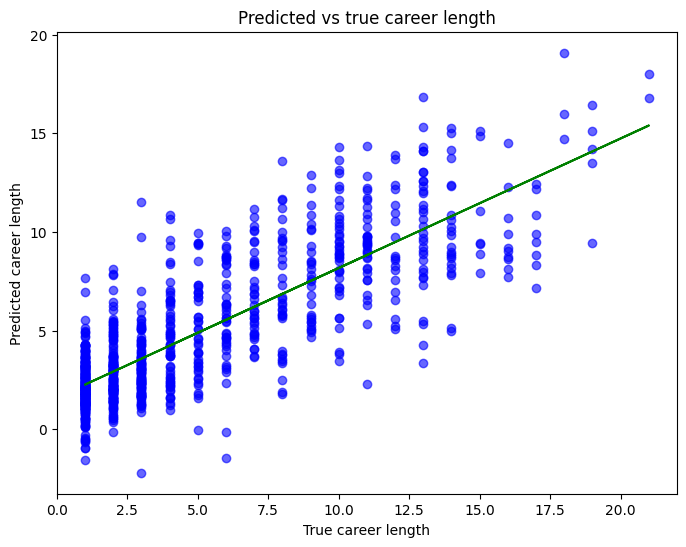

In [1137]:
#PLot of true career length vs predicted career length
plotData = career_length_predictions[career_length_predictions['career_length'] > 0]

x = plotData['career_length'].values.reshape(-1, 1)
y = plotData['predicted_career_length'].values
reg = LinearRegression()
reg.fit(x, y)
y_fit = reg.predict(x)

plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.6, color='blue', label='Data points')
plt.plot(x, y_fit, color='green')
plt.xlabel("True career length")
plt.ylabel("Predicted career length")
plt.title("Predicted vs true career length")
plt.show()

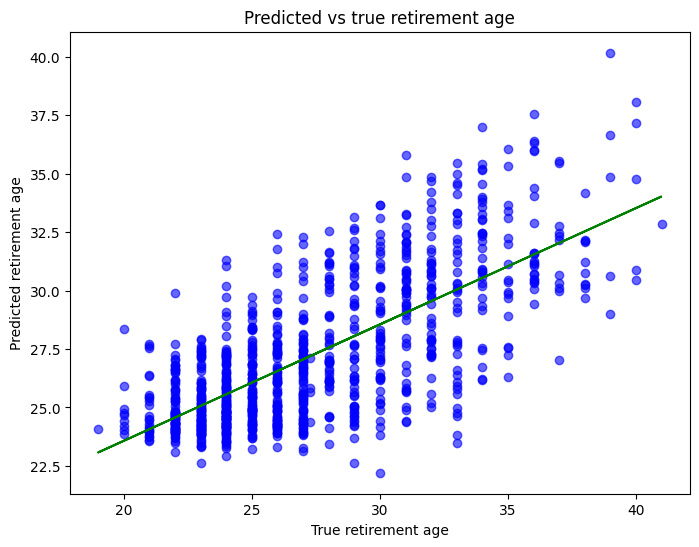

In [1138]:
#PLot of true retirement age vs predicted retirement age
plotData = age_predictions[age_predictions['retirement_age'] > 0]

x = plotData['retirement_age'].values.reshape(-1, 1)
y = plotData['predicted_retirement_age'].values
reg = LinearRegression()
reg.fit(x, y)
y_fit = reg.predict(x)

plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.6, color='blue', label='Data points')
plt.plot(x, y_fit, color='green')
plt.xlabel("True retirement age")
plt.ylabel("Predicted retirement age")
plt.title("Predicted vs true retirement age")
plt.show()

# Logistic Regression

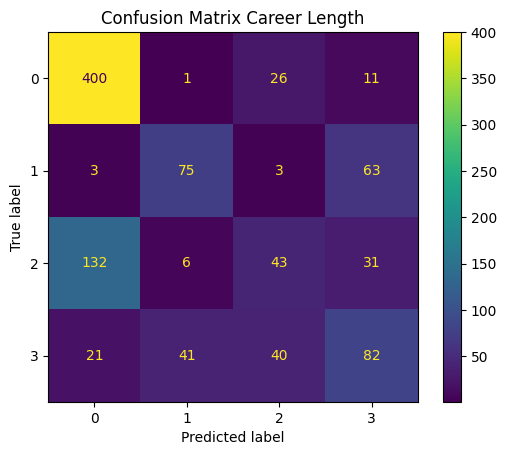

In [ ]:
ConfusionMatrixDisplay.from_estimator(log_model_length, X_test_length_logistic, y_test_length_logistic)
plt.title("Career Length Confusion Matrix")
plt.show()

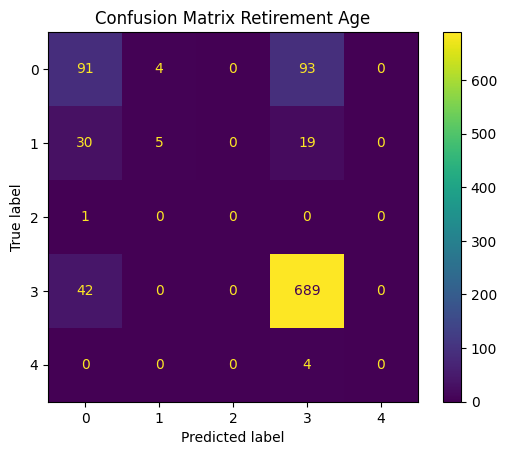

In [ ]:
ConfusionMatrixDisplay.from_estimator(log_model_age, X_test_age_logistic, y_test_age_logistic)
plt.title("Retirement Age Confusion Matrix")
plt.show()

# SQL

In [6]:
%load_ext sql
%sql sqlite:///nba_stats.db

ImportError: cannot import name 'escape_string_literals_with_colon_prefix' from 'sql.parse' (/Users/dylanmurphy/CS577/577venv1/lib/python3.12/site-packages/sql/parse.py)

In [ ]:
%%sql
CREATE TABLE players (
    player_id INTEGER PRIMARY KEY,
    player_name TEXT NOT NULL,
    pos TEXT,
    height REAL,
    weight REAL
);

Running query in 'sqlite:///nba_stats.db'

RuntimeError: (sqlite3.OperationalError) table players already exists
[SQL: CREATE TABLE players (
    player_id INTEGER PRIMARY KEY,
    player_name TEXT NOT NULL,
    pos TEXT,
    height REAL,
    weight REAL
);]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [ ]:
%%sql
CREATE TABLE player_seasons (
    season_id INTEGER PRIMARY KEY AUTOINCREMENT,
    player_id INTEGER NOT NULL,
    season_year INTEGER NOT NULL,
    age INTEGER,
    g INTEGER,
    gs INTEGER,
    mp REAL,
    fg REAL,
    fga REAL,
    fg_percent REAL,
    x3p REAL,
    x3pa REAL,
    x3p_percent REAL,
    x2p REAL,
    x2pa REAL,
    x2p_percent REAL,
    e_fg_percent REAL,
    ft REAL,
    fta REAL,
    ft_percent REAL,
    FOREIGN KEY (player_id) REFERENCES players(player_id)
);

Running query in 'sqlite:///nba_stats.db'

++
||
++
++

In [ ]:
%%sql
CREATE TABLE injuries (
    player_id INTEGER PRIMARY KEY,
    num_injuries INTEGER DEFAULT 0,
    FOREIGN KEY (player_id) REFERENCES players(player_id)
);

Running query in 'sqlite:///nba_stats.db'

++
||
++
++

In [ ]:
%%sql
CREATE TABLE retired_players (
    player_id INTEGER PRIMARY KEY,
    career_length REAL,
    retirement_age REAL,
    avg_mp REAL,
    avg_fg REAL,
    avg_fga REAL,
    avg_fg_percent REAL,
    avg_3p REAL,
    avg_3pa REAL,
    avg_3p_percent REAL,
    avg_2p REAL,
    avg_2pa REAL,
    avg_2p_percent REAL,
    avg_e_fg_percent REAL,
    avg_ft REAL,
    avg_fta REAL,
    avg_ft_percent REAL,
    avg_gs_g_ratio REAL,
    height REAL,
    weight REAL,
    num_injuries INTEGER,
    pos TEXT,
    player_name TEXT
);

Running query in 'sqlite:///nba_stats.db'

++
||
++
++

In [ ]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("nba_stats.db")
for row in conn.execute("PRAGMA table_info(player_seasons);"):
    print(row)

playerPerGameDf.to_sql("player_seasons", conn, if_exists="replace", index=False)
HeightAndWeightDf.to_sql("players", conn, if_exists="replace", index=False)
injury_counts.to_sql("injuries", conn, if_exists="replace", index=False)

(0, 'season', 'INTEGER', 0, None, 0)
(1, 'lg', 'TEXT', 0, None, 0)
(2, 'player', 'TEXT', 0, None, 0)
(3, 'player_id', 'TEXT', 0, None, 0)
(4, 'age', 'REAL', 0, None, 0)
(5, 'team', 'TEXT', 0, None, 0)
(6, 'pos', 'TEXT', 0, None, 0)
(7, 'g', 'INTEGER', 0, None, 0)
(8, 'gs', 'REAL', 0, None, 0)
(9, 'mp_per_game', 'REAL', 0, None, 0)
(10, 'fg_per_game', 'REAL', 0, None, 0)
(11, 'fga_per_game', 'REAL', 0, None, 0)
(12, 'fg_percent', 'REAL', 0, None, 0)
(13, 'x3p_per_game', 'REAL', 0, None, 0)
(14, 'x3pa_per_game', 'REAL', 0, None, 0)
(15, 'x3p_percent', 'REAL', 0, None, 0)
(16, 'x2p_per_game', 'REAL', 0, None, 0)
(17, 'x2pa_per_game', 'REAL', 0, None, 0)
(18, 'x2p_percent', 'REAL', 0, None, 0)
(19, 'e_fg_percent', 'REAL', 0, None, 0)
(20, 'ft_per_game', 'REAL', 0, None, 0)
(21, 'fta_per_game', 'REAL', 0, None, 0)
(22, 'ft_percent', 'REAL', 0, None, 0)
(23, 'orb_per_game', 'REAL', 0, None, 0)
(24, 'drb_per_game', 'REAL', 0, None, 0)
(25, 'trb_per_game', 'REAL', 0, None, 0)
(26, 'ast_per_gam

NameError: name 'playerPerGameDf' is not defined

In [ ]:
%%sql
SELECT 
    player_id,
    gs * 1.0 / NULLIF(g,0) AS gs_g_ratio
FROM player_seasons;


UsageError: Cell magic `%%sql` not found.


In [ ]:
%%sql
SELECT 
    player_id,
    AVG(mp_per_game) AS avg_mp,
    AVG(gs * 1.0 / NULLIF(g,0)) AS avg_gs_g_ratio,
    AVG(fg_per_game) AS avg_fg,
    AVG(fga_per_game) AS avg_fga,
    AVG(fg_percent) AS avg_fg_percent,
    AVG(x3p_per_game) AS avg_3p,
    AVG(x3pa_per_game) AS avg_3pa,
    AVG(x3p_percent) AS avg_3p_percent,
    AVG(x2p_per_game) AS avg_2p,
    AVG(x2pa_per_game) AS avg_2pa,
    AVG(x2p_percent) AS avg_2p_percent,
    AVG(e_fg_percent) AS avg_e_fg_percent,
    AVG(ft_per_game) AS avg_ft,
    AVG(fta_per_game) AS avg_fta,
    AVG(ft_percent) AS avg_ft_percent
FROM player_seasons
GROUP BY player_id;


Running query in 'sqlite:///nba_stats.db'

player_id,avg_mp,avg_gs_g_ratio,avg_fg,avg_fga,avg_fg_percent,avg_3p,avg_3pa,avg_3p_percent,avg_2p,avg_2pa,avg_2p_percent,avg_e_fg_percent,avg_ft,avg_fta,avg_ft_percent
abdelal01,12.211111111111112,0.17031274064137913,2.1555555555555554,4.655555555555555,0.44933333333333336,0.0,0.011111111111111112,0.0,2.1555555555555554,4.633333333333334,0.4514444444444444,0.44933333333333336,0.7888888888888889,1.1111111111111112,0.6713749999999999
abdulka01,36.79,1.0,10.15,18.16,0.55835,0.0,0.0,0.0333,8.49,14.830000000000002,0.5665,0.5657,4.29,5.9399999999999995,0.7277
abdulma01,23.525000000000002,None,4.3,9.816666666666666,0.4295833333333334,None,None,None,None,None,None,None,2.158333333333333,2.85,0.7383333333333333
abdulma02,25.46666666666667,0.5103611351091067,5.699999999999999,12.955555555555556,0.4397777777777778,0.7777777777777778,2.1888888888888887,0.3164444444444444,4.922222222222222,10.744444444444445,0.4583333333333333,0.4668888888888889,1.6555555555555557,1.8333333333333333,0.8931111111111112
abdulta01,19.229999999999997,0.5369678997678154,2.7199999999999998,6.67,0.369,0.05,0.22999999999999998,0.29133333333333333,2.66,6.44,0.37370000000000003,0.37370000000000003,1.34,1.9100000000000001,0.6179
abdulza01,17.614285714285714,None,2.764285714285714,6.928571428571429,0.3995,None,None,None,None,None,None,None,1.6357142857142857,2.314285714285714,0.6747142857142857
abdursh01,32.45,0.7519034002489885,6.007142857142857,12.828571428571427,0.4549285714285714,0.17142857142857143,0.5428571428571428,0.2865384615384615,5.835714285714286,12.264285714285716,0.46235714285714286,0.46092857142857147,4.464285714285714,5.457142857142857,0.8295
abernto01,13.385714285714286,0.0,1.6428571428571428,3.4,0.452,0.0,0.0,0.0,0.95,2.1,0.42075,0.41675,0.7571428571428571,1.0714285714285714,0.6912857142857144
ablefo01,1.0,None,0.0,2.0,0.0,None,None,None,None,None,None,None,0.0,0.0,None
abramjo01,None,None,1.175,6.175,0.0975,None,None,None,None,None,None,None,0.9750000000000001,1.55,0.60725


In [ ]:
%%sql
SELECT 
    ps.player_id,
    MIN(ps.pos) AS pos
FROM player_seasons ps
GROUP BY ps.player_id;


Running query in 'sqlite:///nba_stats.db'

player_id,pos
abdelal01,PF
abdulka01,C
abdulma01,PG
abdulma02,PG
abdulta01,SG
abdulza01,C
abdursh01,C
abernto01,PF
ablefo01,None
abramjo01,None


In [ ]:
%%sql
SELECT 
    player_id,
    MAX(age) AS retirement_age
FROM player_seasons
GROUP BY player_id;

UsageError: Cell magic `%%sql` not found.


In [ ]:
%%sql
INSERT INTO retired_players
SELECT 
    p.player_id,
    MAX(ps.season_year) - MIN(ps.season_year) + 1 AS career_length,
    ra.retirement_age,
    stats.avg_mp,
    stats.avg_fg,
    stats.avg_fga,
    stats.avg_fg_percent,
    stats.avg_3p,
    stats.avg_3pa,
    stats.avg_3p_percent,
    stats.avg_2p,
    stats.avg_2pa,
    stats.avg_2p_percent,
    stats.avg_e_fg_percent,
    stats.avg_ft,
    stats.avg_fta,
    stats.avg_ft_percent,
    stats.avg_gs_g_ratio,
    p.height,
    p.weight,
    inj.num_injuries,
    ps.pos,
    p.player_name
FROM players p
JOIN player_seasons ps USING (player_id)
JOIN (
    SELECT
        player_id,
        AVG(mp_per_game) AS avg_mp,
        AVG(gs * 1.0 / NULLIF(g,0)) AS avg_gs_g_ratio,
        AVG(fg_per_game) AS avg_fg,
        AVG(fga_per_game) AS avg_fga,
        AVG(fg_percent) AS avg_fg_percent,
        AVG(x3p_per_game) AS avg_3p,
        AVG(x3pa_per_game) AS avg_3pa,
        AVG(x3p_percent) AS avg_3p_percent,
        AVG(x2p_per_game) AS avg_2p,
        AVG(x2pa_per_game) AS avg_2pa,
        AVG(x2p_percent) AS avg_2p_percent,
        AVG(e_fg_percent) AS avg_e_fg_percent,
        AVG(ft_per_game) AS avg_ft,
        AVG(fta_per_game) AS avg_fta,
        AVG(ft_percent) AS avg_ft_percent
) stats USING (player_id)
JOIN (
    SELECT player_id, MAX(age) AS retirement_age
    FROM player_seasons
    GROUP BY player_id
) ra USING (player_id)
LEFT JOIN injuries inj USING (player_id)
GROUP BY p.player_id;


UsageError: Cell magic `%%sql` not found.


In [ ]:
%%sql
SELECT
    avg_fg_percent,
    avg_3p_percent,
    avg_2p_percent,
    avg_e_fg_percent,
    avg_ft_percent,
    avg_mp,
    avg_gs_g_ratio,
    avg_fg,
    avg_fga,
    avg_3p,
    avg_3pa,
    avg_2p,
    avg_2pa,
    avg_ft,
    avg_fta,
    height,
    weight,
    num_injuries,
    retirement_age
FROM retired_players;


Running query in 'sqlite:///nba_stats.db'

avg_fg_percent,avg_3p_percent,avg_2p_percent,avg_e_fg_percent,avg_ft_percent,avg_mp,avg_gs_g_ratio,avg_fg,avg_fga,avg_3p,avg_3pa,avg_2p,avg_2pa,avg_ft,avg_fta,height,weight,num_injuries,retirement_age
